# Transformation of features 
Why transformation of features are required?
1. Linear Refression --- Gradient Desent --- Global Minima'
2. Algorithms like KNN, K Means, Hierarichal clustering --- Eucledian distance
Every point has some vectors and deirction

Deep learning Techniques(Standardization, Scaling)
1. ANN-->Global minima, Geadient deasent
2. CNN
3. RNN

0-255 pixels

# Types of transformation
1. Normilization and standardization
2. Scaling to minimum and maximum values
3. Scaling to median and quantiles
4. Gaussian Transformation
5. Logarithmic transformation
6. Reciprocal transformation
7. Square root transformation
8. Exponential transformation
9. Box Cox transformation

In [1]:
import seaborn as sns
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
print(sns.utils.get_data_home())

C:\Users\krish\AppData\Local\seaborn\seaborn\Cache


In [3]:
df = sns.load_dataset("penguins")
print(df.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


# Standardization (Why standardization?)
Standardization comes into picture when feature s of input data set have large difference between their ranges, or simply when they are measured in different measurement units(eg., pounds, meters, miles., eg)

WHy try to bring all the variables or feautures to a similar scale. standardization means centering the variables to zero. 

z=(X - x_mean)/std

In [4]:
# we are working here
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [5]:
import numpy as np
nan_val=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in nan_val:
    print(feature,np.round(df[feature].isnull().mean(),4), "% missing values")

Age 0.1987 % missing values


In [6]:
# filling missing values with median
df.fillna({"Age":df.Age.median()},inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [8]:
# dividing it into independent and dependent features
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
x

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [12]:
x_train,y_train

(     Pclass   Age      Fare
 6         1  54.0   51.8625
 718       3  28.0   15.5000
 685       2  25.0   41.5792
 73        3  26.0   14.4542
 882       3  22.0   10.5167
 ..      ...   ...       ...
 106       3  21.0    7.6500
 270       1  28.0   31.0000
 860       3  41.0   14.1083
 435       1  14.0  120.0000
 102       1  21.0   77.2875
 
 [596 rows x 3 columns],
 6      0
 718    0
 685    0
 73     0
 882    0
       ..
 106    1
 270    0
 860    0
 435    1
 102    0
 Name: Survived, Length: 596, dtype: int64)

In [13]:
# Standardization : we use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()
# fit vs fit_tarnsformation
x_train_scaled=scaler.fit_transform(x_train)

In [15]:
x_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]], shape=(596, 3))

In [16]:
x_test,y_test

(     Pclass   Age     Fare
 709       3  28.0  15.2458
 439       2  31.0  10.5000
 840       3  20.0   7.9250
 720       2   6.0  33.0000
 39        3  14.0  11.2417
 ..      ...   ...      ...
 715       3  19.0   7.6500
 525       3  40.5   7.7500
 381       3   1.0  15.7417
 140       3  28.0  15.2458
 173       3  21.0   7.9250
 
 [295 rows x 3 columns],
 709    1
 439    0
 840    0
 720    1
 39     1
       ..
 715    0
 525    0
 381    1
 140    0
 173    0
 Name: Survived, Length: 295, dtype: int64)

In [17]:
x_test_scaled=scaler.transform(x_test)

In [18]:
x_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [19]:
# Model Building 
# fit() for training and predict for test
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

In [20]:
classification.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
classification.predict(x_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

In [22]:
df_scaled = scaler.fit_transform(df)

In [23]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]],
      shape=(891, 4))

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]],
      shape=(891, 4))

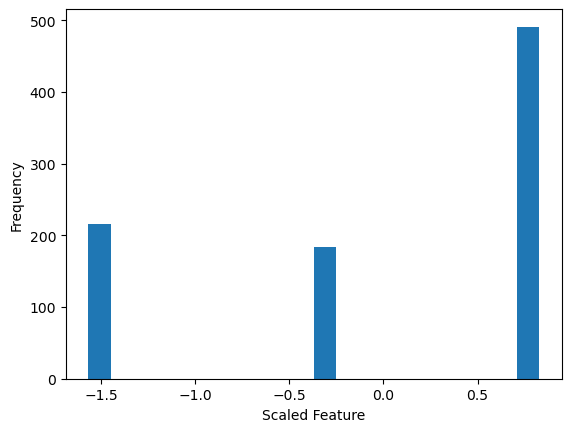

In [26]:
plt.hist(df_scaled[:, 1], bins=20)
plt.xlabel("Scaled Feature")
plt.ylabel("Frequency")
plt.show()

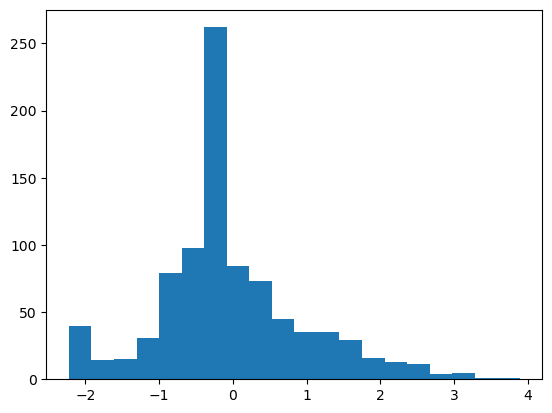

In [27]:
plt.hist(df_scaled[:, 2 ],bins=20)
plt.show()

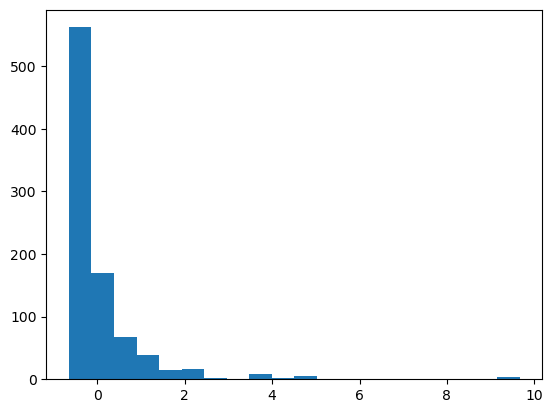

In [28]:
plt.hist(df_scaled[:, 3],bins=20)
plt.show()

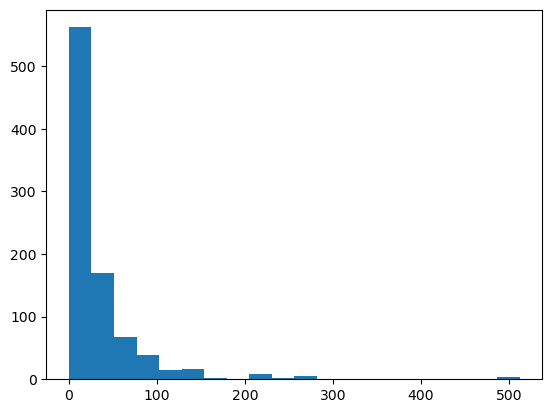

In [29]:
plt.hist(df['Fare'],bins=20)
plt.show()

# min max scaling (# CNN )---Deep learnig techniques
min max scaling scales the values between 0 and 1. x_scaled = (x - x.min)/(x.max - x.min)

In [30]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(x_train),columns=x_train.columns)
df_minmax.head()

,Pclass,Age,Fare
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


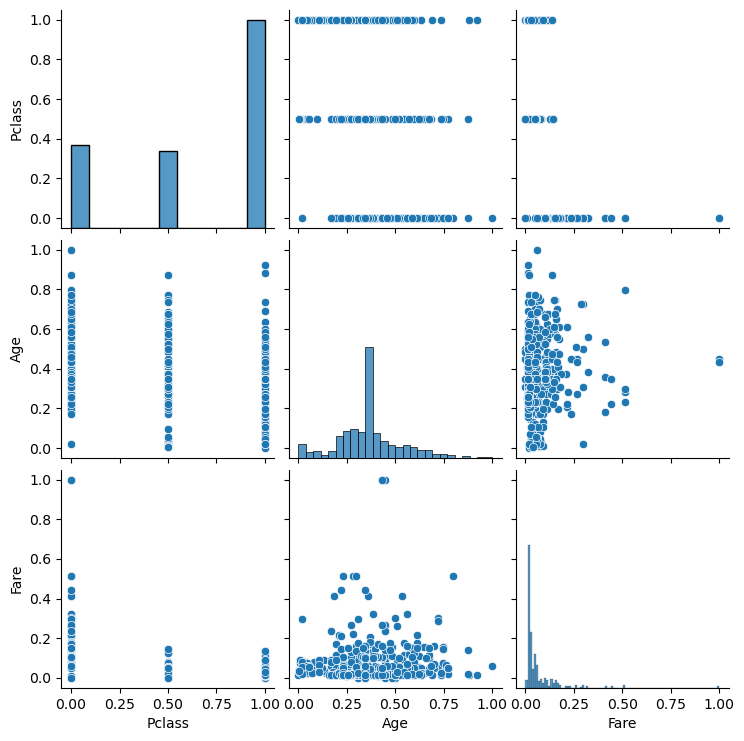

In [33]:
sns.pairplot(df_minmax)

(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

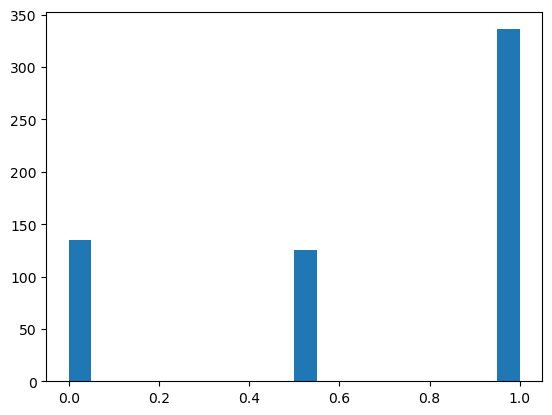

In [34]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 29.,   9.,   9.,  23.,  50.,  63., 180.,  56.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

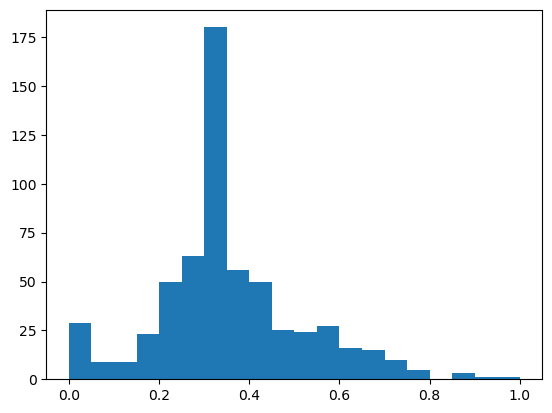

In [35]:
plt.hist(df_minmax['Age'],bins=20)

(array([384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

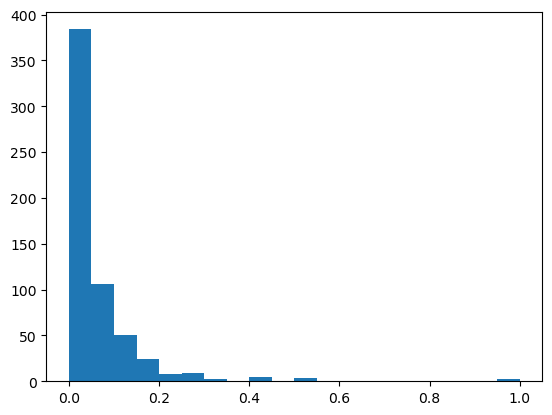

In [36]:
plt.hist(df_minmax['Fare'],bins=20)

# RObust scaler
Robust scaler are robust to outliers. it is used to scale the featuer to median and quantiles scalin using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquartile difference. the interquanitle differnce is the difference between the 75th and the 25th quantile:

IQR = Q3 - Q1

x_scaled=(x-x.median)/IQR

1,2,3,4,5,6,7,8,9,10

9-90 percentile --- 90% of all values in this group is less than 9 1-10 percentile---10% of all values in this group is less than 1 4-40%

In [37]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [39]:
from sklearn.preprocessing import RobustScaler
sclaer=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
df_robust_scaler.head()

,Pclass,Age,Fare
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


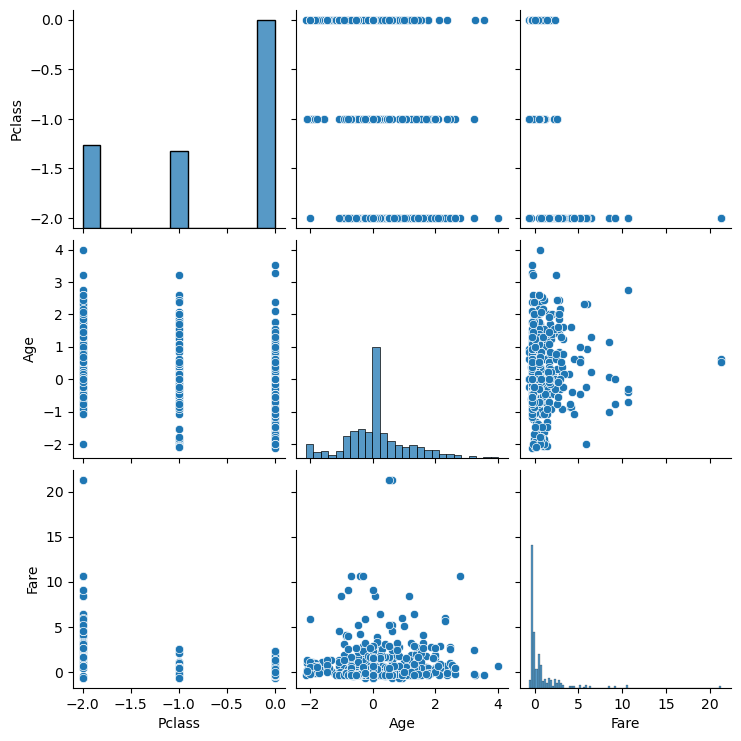

In [40]:
sns.pairplot(df_robust_scaler)

In [41]:
scaler.transform(x_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

# Gaussian Transformation
Some machine learnig algorithms like linear and logistic assume that the features are normally distributed - accuracy - performance

- logarathmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation
- boxcox transformation

In [42]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [43]:
# fillna
df['Age']=df['Age'].fillna(df['Age'].median())

In [44]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [45]:
import scipy.stats as stat
import pylab

In [46]:
# If you wnat to chceck whether feature is guassian or normal distributed
# Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

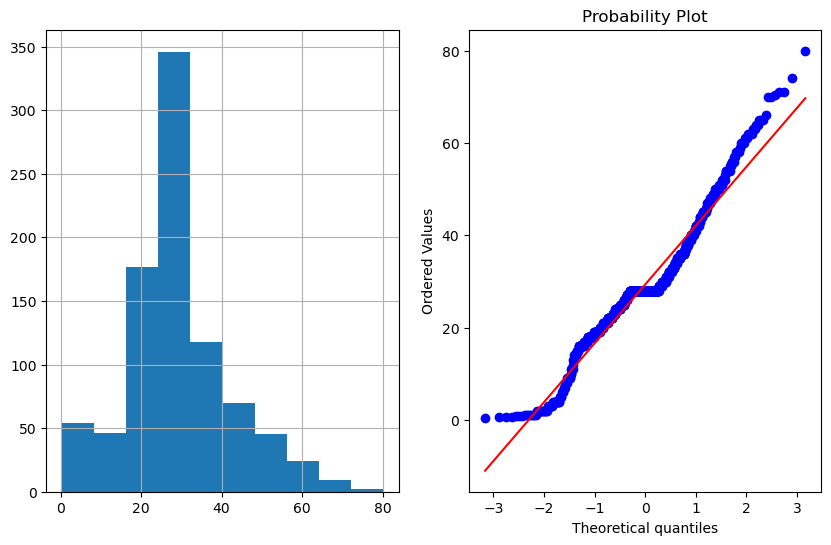

In [47]:
plot_data(df,'Age')

# Logarithmic transformation

In [48]:
import numpy as np

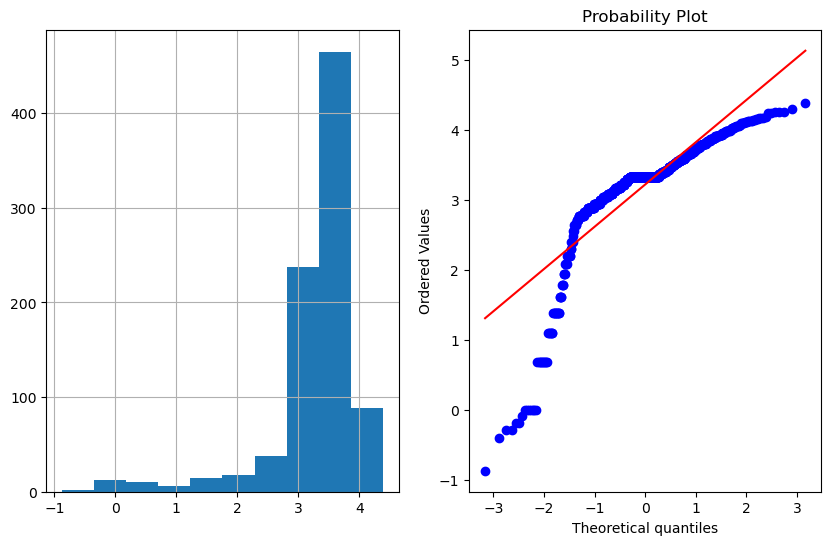

In [49]:
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

# Reciprocal Transformation

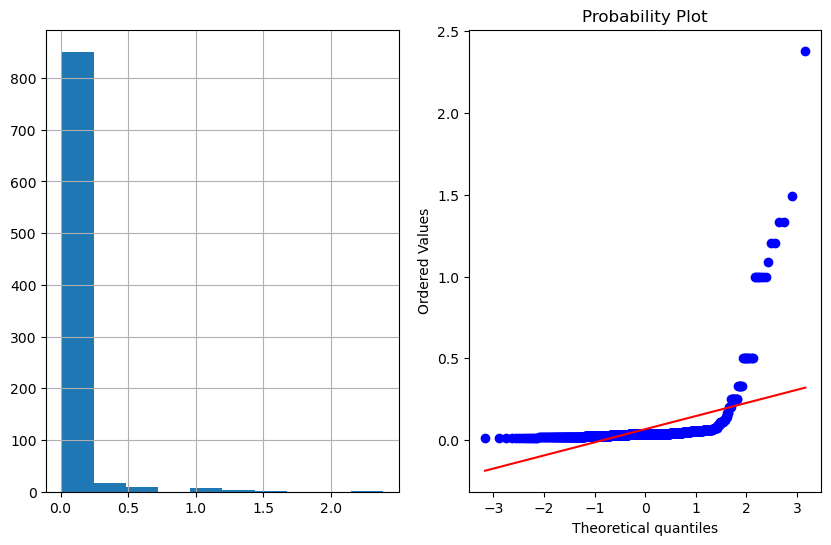

In [50]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

# Square root transformation

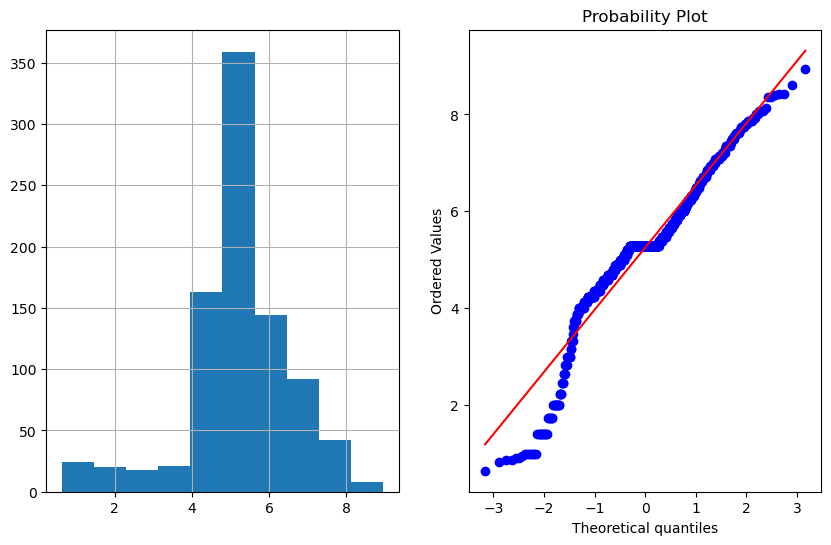

In [51]:
df['Age_square']=df.Age**(1/2)
plot_data(df,'Age_square')

# Exponential transformation

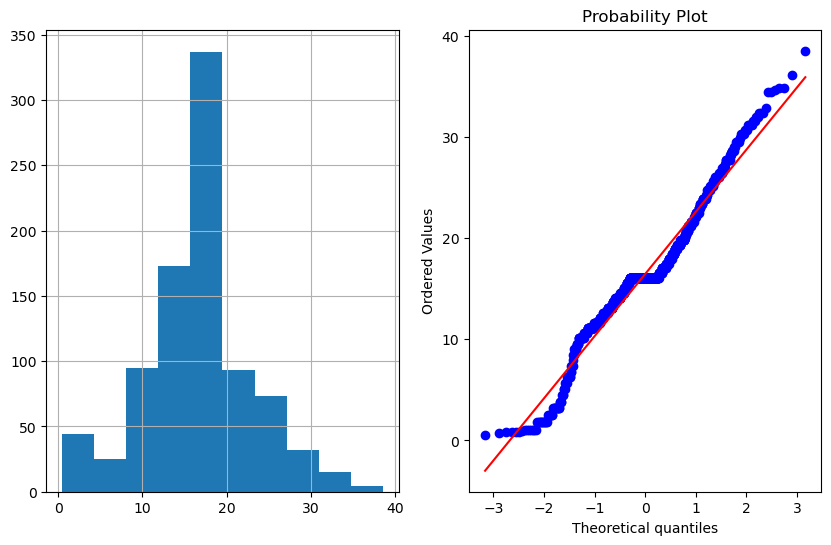

In [53]:
df['Age_exp']=df.Age**(1/1.2)
plot_data(df,'Age_exp')

# boxcox transforamtion

In [54]:
df['Age_boxcox'],parameters=stat.boxcox(df['Age'])
print(parameters)

0.796453194094064


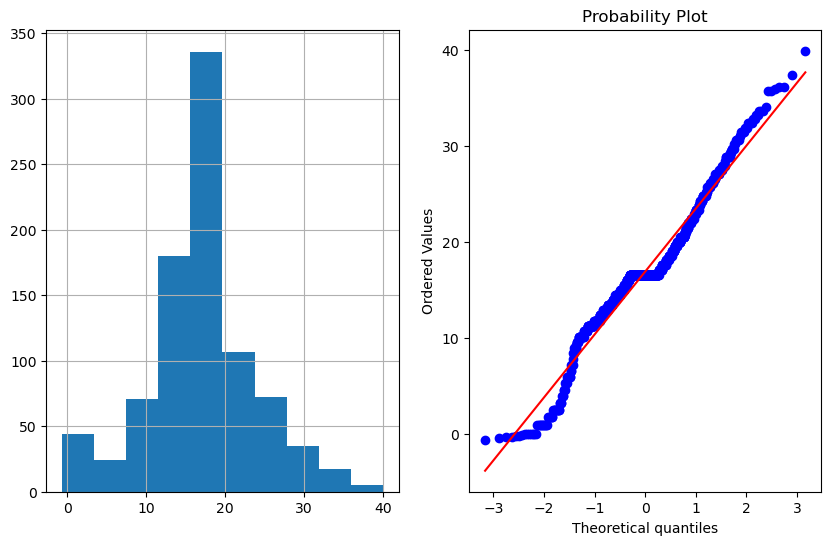

In [55]:
plot_data(df,'Age_boxcox')